<a href="https://colab.research.google.com/github/sssiyam-sudo/MasterThesisWork/blob/main/partialCorrelation_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all the necessary libraries & packages.

In [ ]:
import networkx as nx
import os
import pandas as pd
import numpy as np
from math import sqrt
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing 

!pip install pingouin
import pingouin as pg

In [2]:
df = pd.read_csv('/content/drive/MyDrive/ThesisWork/nsclc_pd1_msk_2018_clinical_data.tsv', sep='\t')

#-----------------
#-----------------
#-----------------

-------------------------------------
## **Data exploration and cleaning.**
-------------------------------------

In [3]:
df.head()

,Study ID,Patient ID,Sample ID,Diagnosis Age,Cancer Type,Cancer Type Detailed,Durable Clinical Benefit,FGA,Fraction Genome Altered,Gene Panel,...,Oncotree Code,PD-L1 Score (%),Progress Free Survival (Months),Progression Free Status,Number of Samples Per Patient,Sex,Smoker,Somatic Status,TMB (nonsynonymous),Treatment Type
0,nsclc_pd1_msk_2018,P-0000012,P-0000012-T03-IM3,58,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,YES,0.18,0.1844,IMPACT341,...,LUAD,NaN,27.20,0:Not Progressed,1,Female,Ever,Matched,32.165504,Combination
1,nsclc_pd1_msk_2018,P-0000082,P-0000082-T01-IM3,60,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,YES,0.36,0.3606,IMPACT341,...,LUAD,100.0,14.50,1:Progressed,1,Male,Ever,Matched,1.109155,Monotherapy
2,nsclc_pd1_msk_2018,P-0000208,P-0000208-T01-IM3,68,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,NO,0.12,0.1173,IMPACT341,...,LUAD,3.0,4.17,1:Progressed,1,Female,Ever,Matched,2.218311,Monotherapy
3,nsclc_pd1_msk_2018,P-0000235,P-0000235-T01-IM3,77,Non-Small Cell Lung Cancer,Lung Squamous Cell Carcinoma,NO,0.24,0.2380,IMPACT341,...,LUSC,NaN,0.60,1:Progressed,1,Male,Ever,Matched,8.873242,Monotherapy
4,nsclc_pd1_msk_2018,P-0000299,P-0000299-T01-IM3,66,Non-Small Cell Lung Cancer,Large Cell Neuroendocrine Carcinoma,NO,0.01,0.0051,IMPACT341,...,LUNE,NaN,1.63,1:Progressed,1,Male,Ever,Matched,7.764087,Combination


In [3]:
df.rename(columns = {'Study ID':'Study_ID', 'Patient ID':'Patient_ID',
                     'Sample ID':'Sample_ID' , 'Diagnosis Age':'Diagnosis_Age' ,
                     'Cancer Type':'CancerType' , 'Cancer Type Detailed':'Cancer_Type_Detailed' ,
                     'Durable Clinical Benefit':'Durable_Clinical_Benefit' , 'FGA':'FGA' , 
                     'Fraction Genome Altered':'Fraction_Genome_Altered' , 'Gene Panel':'GenePanel',
                     'Lines of treatment':'Linesoftreatment' , 'Mutation Count':'MutationCount' , 
                     'Mutation Rate':'Mutation_Rate' , 'Oncotree Code':'OncotreeCode', 
                     'PD-L1 Score (%)':'PD-L1Score%' , 'Progress Free Survival (Months)':'ProgressFreeSurvival_Months' ,
                     'Progression Free Status':'Progression' ,
                     'Number of Samples Per Patient':'Number_of_Samples_Per_Patient' , 'Sex':'Gender' ,
                     'Smoker':'Smoker' , 'Somatic Status':'SomaticStatus' , 'TMB (nonsynonymous)':'TMB',
                     'Treatment Type':'TreatmentType'}, inplace = True)

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Study_ID                       240 non-null    object 
 1   Patient_ID                     240 non-null    object 
 2   Sample_ID                      240 non-null    object 
 3   Diagnosis_Age                  240 non-null    int64  
 4   CancerType                     240 non-null    object 
 5   Cancer_Type_Detailed           240 non-null    object 
 6   Durable_Clinical_Benefit       240 non-null    object 
 7   FGA                            240 non-null    float64
 8   Fraction_Genome_Altered        240 non-null    float64
 9   GenePanel                      240 non-null    object 
 10  IRB                            240 non-null    object 
 11  Linesoftreatment               240 non-null    int64  
 12  MutationCount                  240 non-null    int

In [ ]:
msno.matrix(df)

In [5]:
df.drop(df.columns[15], axis=1, inplace=True) #dropping the column with null value in it.

In [6]:
#removing uneffective columns
df.drop(df.columns[[0,1,2,5,8,13,17]], axis=1, inplace=True)

In [7]:
label_encoder = preprocessing.LabelEncoder()

cols = ['Diagnosis_Age','CancerType','Durable_Clinical_Benefit','IRB','GenePanel','OncotreeCode','ProgressFreeSurvival_Months','Progression','Gender','Smoker','SomaticStatus','TMB','TreatmentType']
# sklearn labelencoder
df[cols] = df[cols].apply(preprocessing.LabelEncoder().fit_transform)

In [8]:
df.head()

,Diagnosis_Age,CancerType,Durable_Clinical_Benefit,FGA,GenePanel,IRB,Linesoftreatment,MutationCount,OncotreeCode,ProgressFreeSurvival_Months,Progression,Gender,Smoker,SomaticStatus,TMB,TreatmentType
0,22,0,2,0.18,0,0,1,30,0,154,0,0,0,0,58,0
1,24,0,2,0.36,0,0,4,1,0,134,1,1,0,0,2,1
2,32,0,1,0.12,0,0,1,2,0,67,1,0,0,0,5,1
3,41,0,1,0.24,0,1,3,8,2,2,1,1,0,0,23,1
4,30,0,1,0.01,0,0,2,7,1,23,1,1,0,0,19,0


In [9]:
df.groupby(['Durable_Clinical_Benefit'])['Durable_Clinical_Benefit'].count()

Durable_Clinical_Benefit
0     13
1    158
2     69
Name: Durable_Clinical_Benefit, dtype: int64

#---------------------------------
**Dividing the dataset for RESPONDER vs NONRESPONDER patients**
#---------------------------------

In [10]:
responder = df[(df['Durable_Clinical_Benefit'] == 2 )]
responder.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 0 to 230
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Diagnosis_Age                69 non-null     int64  
 1   CancerType                   69 non-null     int64  
 2   Durable_Clinical_Benefit     69 non-null     int64  
 3   FGA                          69 non-null     float64
 4   GenePanel                    69 non-null     int64  
 5   IRB                          69 non-null     int64  
 6   Linesoftreatment             69 non-null     int64  
 7   MutationCount                69 non-null     int64  
 8   OncotreeCode                 69 non-null     int64  
 9   ProgressFreeSurvival_Months  69 non-null     int64  
 10  Progression                  69 non-null     int64  
 11  Gender                       69 non-null     int64  
 12  Smoker                       69 non-null     int64  
 13  SomaticStatus        

In [11]:
nonResponder = df[(df['Durable_Clinical_Benefit'] == 1 )]
nonResponder.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 2 to 238
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Diagnosis_Age                158 non-null    int64  
 1   CancerType                   158 non-null    int64  
 2   Durable_Clinical_Benefit     158 non-null    int64  
 3   FGA                          158 non-null    float64
 4   GenePanel                    158 non-null    int64  
 5   IRB                          158 non-null    int64  
 6   Linesoftreatment             158 non-null    int64  
 7   MutationCount                158 non-null    int64  
 8   OncotreeCode                 158 non-null    int64  
 9   ProgressFreeSurvival_Months  158 non-null    int64  
 10  Progression                  158 non-null    int64  
 11  Gender                       158 non-null    int64  
 12  Smoker                       158 non-null    int64  
 13  SomaticStatus       

#-----------------
#-----------------
#-----------------

#------------------------------------------
Calculating partial correlation.

In [13]:
 trial = pg.partial_corr(data=responder, x='IRB', y='Progression', covar='Durable_Clinical_Benefit', method='spearman')
 trial

/usr/local/lib/python3.8/dist-packages/pingouin/correlation.py:861: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
/usr/local/lib/python3.8/dist-packages/pingouin/correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix


,n,r,CI95%,p-val
spearman,69,-0.321729,"[-0.52, -0.09]",0.007464


#-------------------------

# Responder

In [14]:
responderCorr = pg.pairwise_corr(responder, method='spearman', alternative='greater', padjust='bonf').round(3)
responderCorr = responderCorr.iloc[:, [0,1,5,7]]
responderCorr.rename(columns = {'X':'Node1', 'Y':'Node2',
                              'r':'corr', 'p-unc':'p-value'}, inplace = True)
responderCorr

,Node1,Node2,corr,p-value
0,Diagnosis_Age,FGA,-0.051,0.663
1,Diagnosis_Age,GenePanel,0.040,0.372
2,Diagnosis_Age,IRB,0.067,0.292
3,Diagnosis_Age,Linesoftreatment,0.104,0.198
4,Diagnosis_Age,MutationCount,-0.155,0.898
...,...,...,...,...
73,Gender,TMB,-0.099,0.790
74,Gender,TreatmentType,-0.040,0.628
75,Smoker,TMB,-0.422,1.000
76,Smoker,TreatmentType,-0.195,0.946


In [15]:
P_responderCorr = responderCorr.loc[(responderCorr['p-value'] < 0.05)]
rows = len(P_responderCorr.axes[0])
print('Total significant pairs :' ,rows)
P_responderCorr

Total significant pairs : 12


,Node1,Node2,corr,p-value
7,Diagnosis_Age,Progression,0.251,0.019
15,FGA,MutationCount,0.358,0.001
16,FGA,OncotreeCode,0.215,0.038
21,FGA,TMB,0.343,0.002
23,GenePanel,IRB,0.317,0.004
32,GenePanel,TreatmentType,0.222,0.033
33,IRB,Linesoftreatment,0.580,0.000
41,IRB,TreatmentType,0.685,0.000
49,Linesoftreatment,TreatmentType,0.458,0.000
55,MutationCount,TMB,0.994,0.000


## **Non Responder**

In [16]:
nonResponderCorr = pg.pairwise_corr(nonResponder, method='spearman', alternative='greater', padjust='bonf').round(3)
nonResponderCorr = nonResponderCorr.iloc[:, [0,1,5,7]]
nonResponderCorr.rename(columns = {'X':'Node1', 'Y':'Node2',
                              'r':'corr', 'p-unc':'p-value'}, inplace = True)
nonResponderCorr

,Node1,Node2,corr,p-value
0,Diagnosis_Age,FGA,-0.058,0.764
1,Diagnosis_Age,GenePanel,0.113,0.078
2,Diagnosis_Age,IRB,0.125,0.059
3,Diagnosis_Age,Linesoftreatment,-0.038,0.683
4,Diagnosis_Age,MutationCount,0.111,0.083
...,...,...,...,...
61,Gender,TMB,0.015,0.428
62,Gender,TreatmentType,0.000,0.500
63,Smoker,TMB,-0.359,1.000
64,Smoker,TreatmentType,-0.023,0.613


In [17]:
P_nonResponderCorr = nonResponderCorr.loc[(nonResponderCorr['p-value'] < 0.05)]
rows = len(P_nonResponderCorr.axes[0])
print('Total significant pairs :' ,rows)
print('')
P_nonResponderCorr

Total significant pairs : 15



,Node1,Node2,corr,p-value
7,Diagnosis_Age,Gender,0.230,0.002
14,FGA,MutationCount,0.297,0.000
19,FGA,TMB,0.289,0.000
20,FGA,TreatmentType,0.238,0.001
21,GenePanel,IRB,0.292,0.000
30,IRB,Linesoftreatment,0.264,0.000
31,IRB,MutationCount,0.191,0.008
36,IRB,TMB,0.167,0.018
37,IRB,TreatmentType,0.628,0.000
42,Linesoftreatment,Smoker,0.154,0.027


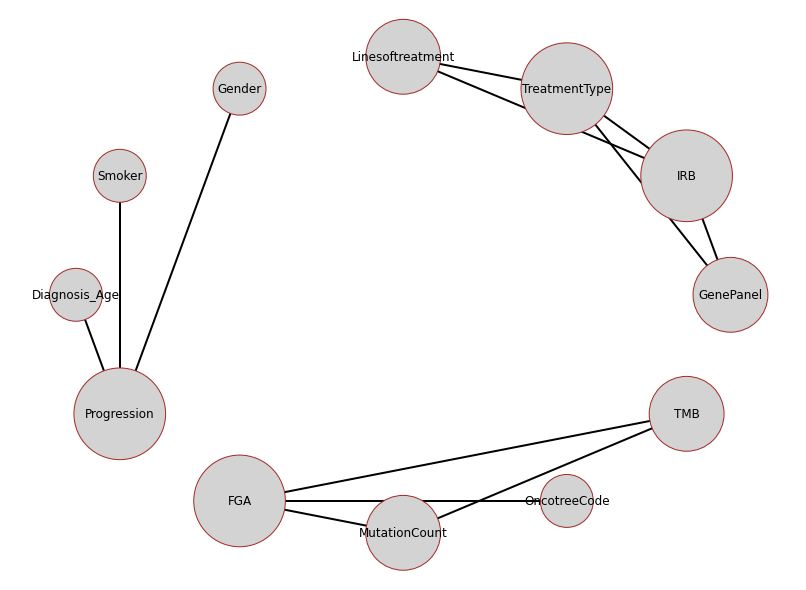

In [18]:
G1 = nx.Graph()
G1 = nx.from_pandas_edgelist(P_responderCorr, 'Node1', 'Node2' , 'corr')
d1 = dict(G1.degree)
figure(figsize=(11, 8))
nx.draw_shell(G1, with_labels=True,width=2 ,
              node_color='lightgray',edgecolors='brown',
              nodelist=d1.keys(), node_size=[v * 2800 for v in d1.values()] )

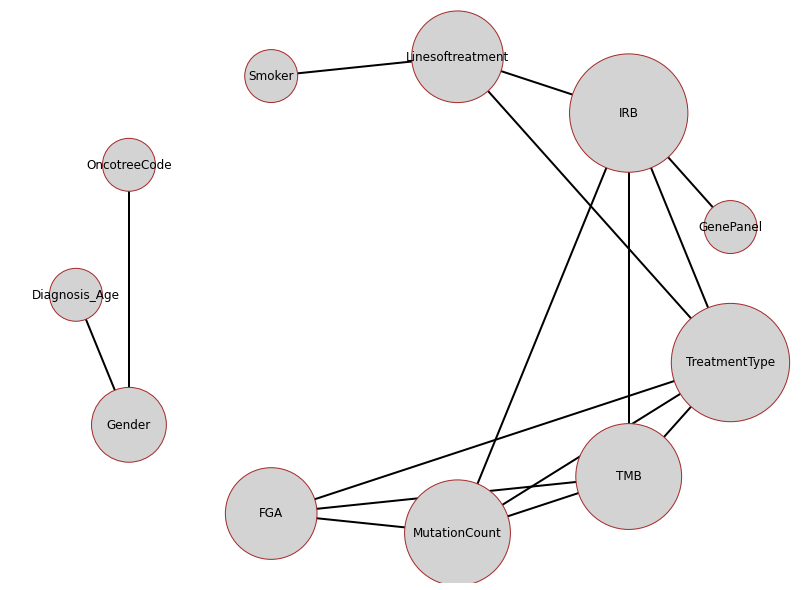

In [19]:
G2 = nx.Graph()
G2 = nx.from_pandas_edgelist(P_nonResponderCorr, 'Node1', 'Node2' , 'corr')
d2 = dict(G2.degree)
figure(figsize=(11, 8))
nx.draw_shell(G2, with_labels=True,width=2 ,
              node_color='lightgray',edgecolors='brown',
              nodelist=d2.keys(), node_size=[v * 2800 for v in d2.values()] )